# Support-vector Machine approach to detecting heart disease.

Import all relevant modules.

In [34]:
#For handling data and mathematics
import pandas as pd
import numpy as np

#For handling plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#For handling support vector machine
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib notebook

Load the data and check it is loaded correctly. Each row denotes one patient and the column ```target``` denotes whether the given patient has heart disease (```target``` = 1) or doesn't (```target``` = 0). We then have a task for our machine learning model: from the data provided for any patient, attempt to predict ```target```. 

In [2]:
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now I utilise feature selection dimensionality reduction and pick out the subset of random variables I think are the best predictors of ```target```. I am going to choose ```age```, maximum heart rate ```thalach```, resting blood pressure ```trestbps``` and cholesterol level ```chol```. We shall visualise the data to see which combination looks most promising.

In [7]:
def plot_features(feature_list):
    colours = ['blue', 'red']
    
    selected_features = pd.DataFrame()
    for each_feature in feature_list:
        selected_features[each_feature] = heart_data[each_feature]
        
    if len(feature_list) == 2:
        #fig = plt.figure(figsize=(18, 16))
        plt.scatter(selected_features.iloc[:,0], selected_features.iloc[:,1], color = [colours[heart_data['target'][i]] for i in range(len(heart_data[each_feature]))])
        return None

    elif len(feature_list) == 3:
        fig = plt.figure(figsize=(18, 16))
        ax = fig.add_subplot(111, projection='3d')
        plt.scatter(selected_features.iloc[:,0], selected_features.iloc[:,1], selected_features.iloc[:,2], color = [colours[heart_data['target'][i]] for i in range(len(heart_data[each_feature]))])
        return None
    
    else:
        return "Plotting not supported for " + str(len(feature_list)) + " variables."

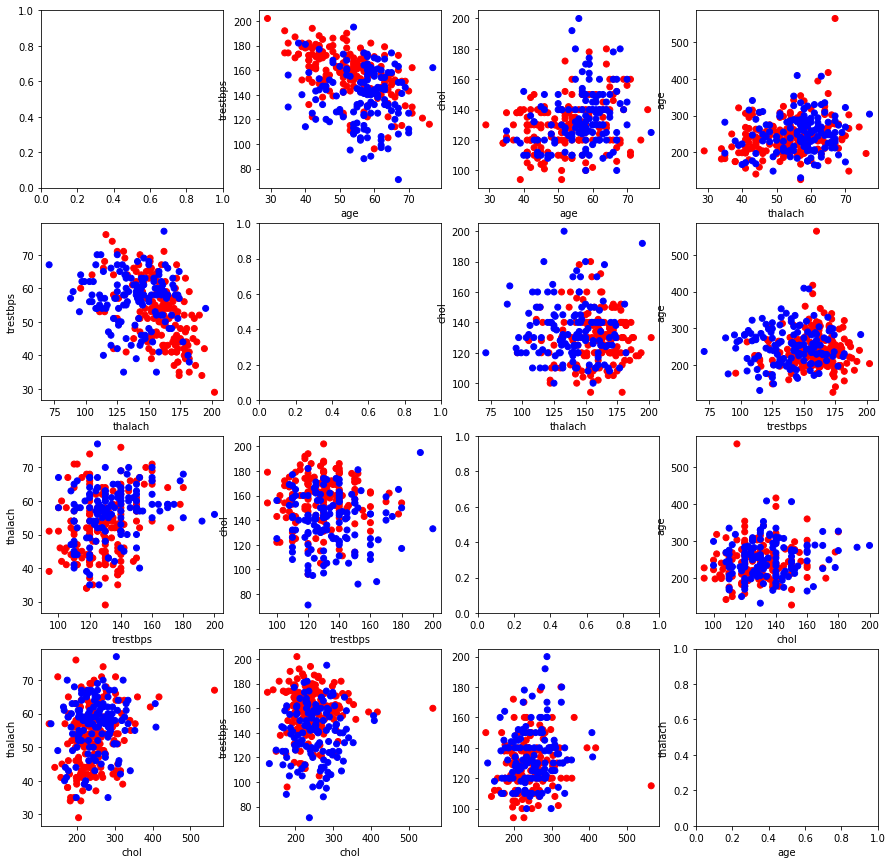

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=4)
feature_list = ['age', 'thalach', 'trestbps', 'chol'] 

fig.set_figheight(15)
fig.set_figwidth(15)

for row in feature_list:
    for column in feature_list:
        if column != row:
            plt.xlabel(row)
            plt.ylabel(column)
            plt.sca(ax[feature_list.index(row), feature_list.index(column)])
            plot_features([row, column])


plt.show()

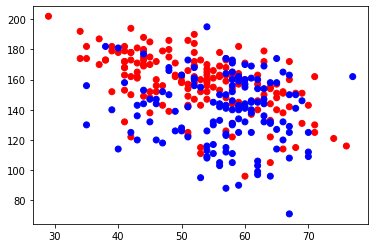

In [12]:
colours = ['blue', 'red']
plt.scatter(heart_data['age'], heart_data['thalach'], color = [colours[heart_data['target'][i]] for i in range(len(heart_data['age']))])
plt.show()

From the above plots it seems sensible to choose the variables ```age``` and ```thalach```. We now make full use of the funcion and plot some 3D plots involving these variables and one of the others to see if we can find a better 'separation' to fit the (3D) hyperplane.

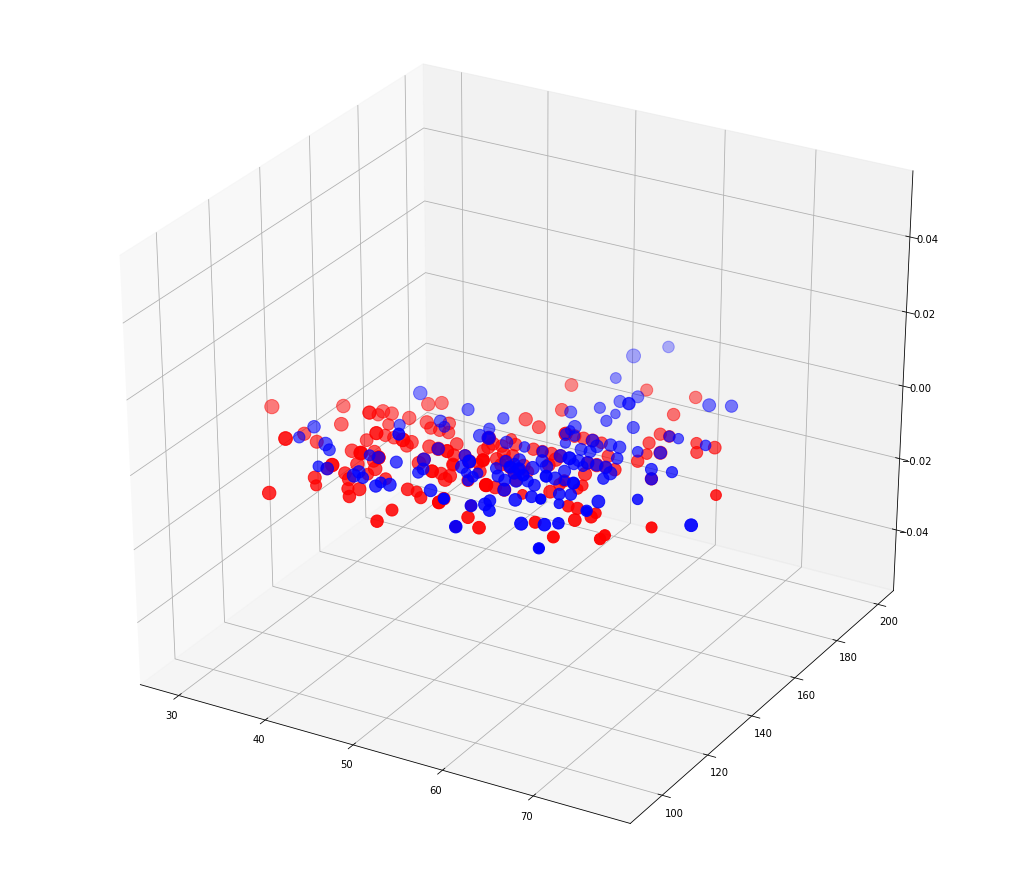

In [19]:
plot_features(['age', 'trestbps', 'thalach'])

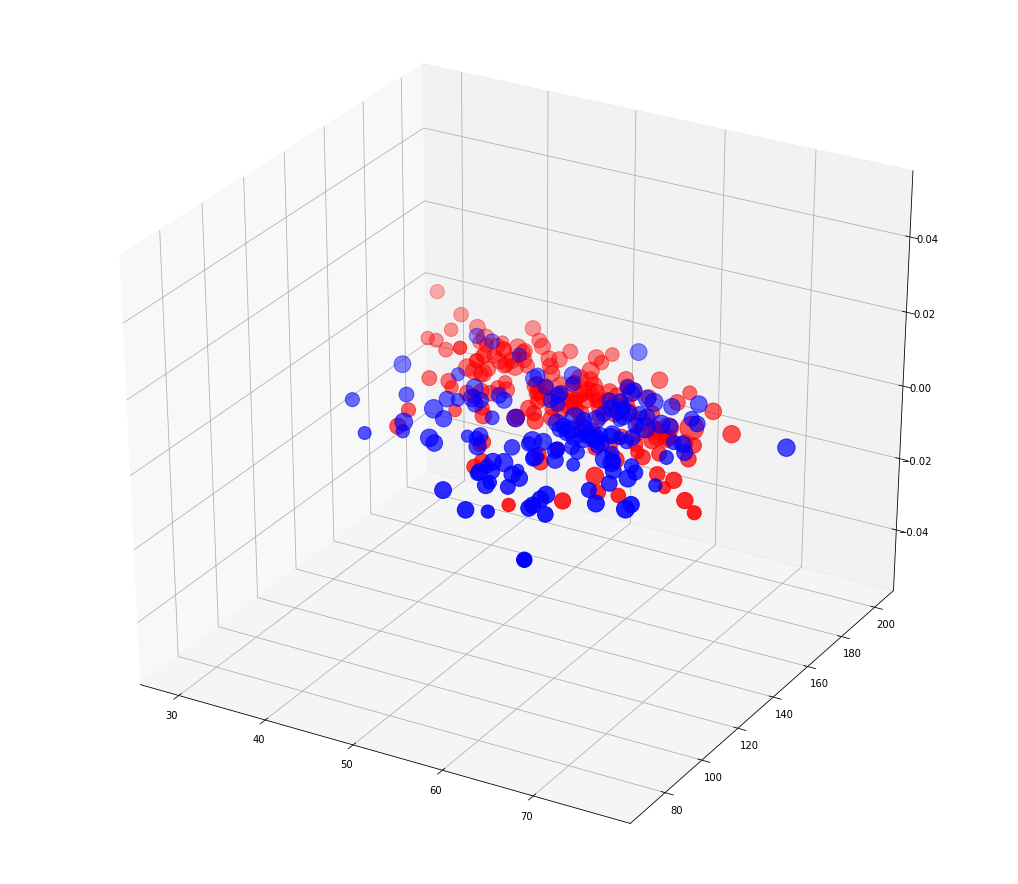

In [20]:
plot_features(['age', 'thalach', 'chol'])

It looks as if a combination of the variables ```age```, ```thalach``` and ```chol``` best seperate the data. So now we train the SVM on these variables. 

First create a new dataframe by extracting the columns corresponding to the variables under consideration by this model, then split the data into a training and test set in the ratio 7:3. 

Finally, fit the model and evaluate the accuracy on the test set.

In [15]:
selected_features = heart_data[['age', 'thalach', 'chol']].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, heart_data.target, test_size=0.3)

In [24]:
#Construct the SVM model and fit the training data.
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

#Make predictions on the test data.
y_pred = clf.predict(X_test)

In [25]:
#Evaluate the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7802197802197802


We have achieved 78 percent accuracy when predicting instances of heart disease using our support-vector machine.